# 1. 데이터 파악

## 기본 설정 및 원본 데이터 백업

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.font_manager as fm

# 한글 폰트 설정 (여러 옵션 시도)
try:
    # Apple SD Gothic Neo 사용 (macOS 기본 한글 폰트)
    plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
except:
    try:
        # NanumGothic 사용
        plt.rcParams['font.family'] = 'NanumGothic'
    except:
        # AppleGothic 사용
        plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 폰트 캐시 강제 재생성
fm._load_fontmanager(try_read_cache=False)

hotel = pd.read_csv("hotel_data_modified.csv")

hotel_backup = hotel.copy()

## 기본 데이터 파악

In [ ]:
# print(hotel.shape)
# print(hotel.columns)
# print(hotel.info())

(119390, 29)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canc

총 데이터 개수: 119390개 / 총 칼럼 개수: 29개(개수 많으므로 명확화 필요)

### 칼럼 정리 표

고객 요청 사항
| **칼럼명** | **유형** | **설명** | **특이사항** | **고려사항** |
| --- | --- | --- | --- | --- |
| hotel | object | 호텔명 (Resort Hotel 혹은 City Hotel) |  |  |
| adults | int | 예약된 어른의 수 |  |  |
| children | float | 예약된 어린이의 수 |  | adults, babies와 다르게 float 형식인 점 확인 필요. |
| babies | int | 예약된 아기의 수 |  |  |
| meal | object | 예약된 식사 유형 <br>- Undefined/SC: 식사 포함되지 않은 옵션 <br>- BB: Bed & Breakfast 옵션 <br>- HB: Half board (아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션 <br>- FB: Full board (아침, 점심, 저녁) |  |  |
| required_car_parking_spaces | int | 고객이 요구하는 주차 공간 수 |  |  |
| reserved_room_type | object | 예약한 룸 타입 코드 |  |  |
| assigned_room_type | object | 배정된 룸 타입 코드. 호텔 운영상의 이유(ex. 초과 예약 등) <br>또는 고객 요청으로 인해 예약한 객실과 다른 객실 유형이 배정되는 경우가 존재. |  | reserved_room_type과 assigned_room_type이 다른지 여부를 0과 1로 나타내는 칼럼 생성. |
| total_of_special_requests | int | 고객의 특별 요청 건수 (ex. 트윈 베드, 아기 침대, 고층, 특별한 뷰 등) | 이게 required_car 등에서 적용되는 건지 확인 필요. |  |

고객 정보
| **칼럼명** | **유형** | **설명** | **특이사항** | **고려사항** |
| --- | --- |--- |--- |--- |
| country | object | 투숙객의 출신 국가. 카테고리는 ISO 3155-3:2013 형식으로 표시 |  |  |
| is_repeated_guest | int | 이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값 |  |  |
| previous_cancellations | int | 현재 예약 이전에 고객이 취소한 이전 예약 수 |  |  |
| previous_bookings_not_canceled | int | 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수 |  | previous cancellation와의 비율로 추가 칼럼 생성. |

예약 경로(마케팅 등)
| **칼럼명** | **유형** | **설명** | **특이사항** | **고려사항** |
| --- | --- |--- |--- |--- |
| agent | float | 예약을 진행한 여행사의 ID |  |  |
| company | float | 예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID |  |  |
| market_segment | object | 시장 세그먼트. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미. |  |  |
| distribution_channel | object | 예약 유통 채널. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미. |  |  |

일정 관련 정보
| **칼럼명** | **유형** | **설명** | **특이사항** | **고려사항** |
| --- | --- |--- |--- |--- |
| lead_time | int | 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 날짜) |  |  |
| arrival_date_year | int | 고객의 호텔 도착 연도 |  |  |
| arrival_date_month | object | 고객의 호텔 도착 월 |  | int로 데이터 유형 바꾸기 |
| arrival_date_week_number | int | 고객의 호텔 도착 주(예시: 2015년도 셋째 주에 도착 → arrival_date_week_number = 3) |  |  |
| arrival_date_day_of_month | int | 고객의 호텔 도착 일(예시: 3월 2일에 도착 → arrival_date_day_of_month = 2) |  |  |
| stays_in_weekend_nights | int | 고객이 호텔에 숙박했거나 예약한 주말 밤 수(토요일~일요일)<br>(예시: 평일 3일 주말 2일 예약한 경우 → stays_in_weekend_nights = 2) |  |  |
| stays_in_week_nights | int | 고객이 호텔에 숙박했거나 예약한 주중 밤 수(월요일~금요일)<br>(예시: 평일 3일 주말 2일 예약한 경우 → stays_in_week_nights = 3) |  |  |

예약 상태 관련 정보
| **칼럼명** | **유형** | **설명** | **특이사항** | **고려사항** |
| --- | --- |--- |--- |--- |
| is_canceled | int | 호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값 |  |  |
| reservation_status | object | 예약의 마지막 상태, 총 3가지 카테고리로 구성 <br>- Canceled: 고객이 예약을 취소함 <br>- Check-Out: 고객이 체크인을 하고 체크아웃을 함 <br>- No-Show: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음. | **No-Show도 is_canceled에 1로 표시됨.** |  |
| reservations_status_date | object | 마지막 예약 상태(reservation_status)가 설정된 날짜. |   | 기록을 늦게 해서 체크인 날짜보다 reservation_status_date가 늦게 바뀐 적이 있는지 확인 필요. |
| days_in_waiting_list | int | 예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수 |  |  |
| booking_changes | int | 예약 시점부터 예약 취소/체크인 시점까지 예약에 대한 변경/수정 횟수 |  | 최초 예약 취소되었을 때 1로 기록되지 않는지 한 번 더 확인. |

## 칼럼 이해



### children

: adults, babies와 다르게 children 칼럼만 float 타입이므로, 소수가 사용되어야 하는 특별한 이유가 있는지 살펴본다.

특별히 따로 적용되는 규칙은 없으므로, 전처리 과정에서 결측치 제거 후 데이터 타입 변경 계획.

In [ ]:
print(hotel["children"].unique())

[ 0.  1.  2. 10.  3. nan]


### total_of_special_requests

: 고객의 요구 사항을 나타내는 칼럼들이 이 칼럼에 반영되는지 확인 결과, 반영되지 않는다.

In [ ]:
print(hotel["total_of_special_requests"].unique())

request_column_list = ["adults", "children", "babies", "reserved_room_type", "required_car_parking_spaces", "meal"]

for each_column in request_column_list:
    zero_request = set(hotel[hotel["total_of_special_requests"] == 0][each_column].unique())
    original_column = set(hotel[each_column].unique())
    
    if zero_request == original_column:
        print(each_column, ": 영향 안 미침")
        
    else:
        print(f"{each_column} 차이 데이터: {original_column - zero_request}")

[1 0 3 2 4 5]
adults : 영향 안 미침
children : 영향 안 미침
babies 차이 데이터: {np.int64(2)}
reserved_room_type : 영향 안 미침
required_car_parking_spaces : 영향 안 미침
meal : 영향 안 미침


### booking_changes

: 오인 가능성을 없애기 위해, 예약 후 예약 취소를 진행했을 때 1로 기록되지 않는지 한 번 더 확인.

In [ ]:
print(hotel[hotel["is_canceled"]==1]["booking_changes"].unique())

[ 0  2  1  3  4  8  5  7  6 10 16  9 14]


is_canceled 값이 1인 데이터 중 booking_changes 값이 0인 데이터가 있으므로,

예약 취소 자체는 booking_changes에 반영되지 않음을 확인.

### reservation_status

In [ ]:
# print(hotel["reservation_status"].unique())

Check-Out이라는 값은 체크인 후 체크아웃까지 완료되었다는 의미이다.

즉, 체크인 후 체크아웃 직전까지는 'Check-out', 'Canceled', 'No-Show' 중 어디에도 해당하지 않는다.

이를 통해 이 데이터(hotel_data_modified.csv)는 현재 남은 서비스 일정이 전혀 없는 사후의 데이터라는 것을 알 수 있다.

### 방 개수는 1개로 고정인지 확인
: 방 2개를 동시에 예약할 수 있는 건지 확인한다.

In [ ]:
# print(hotel["reserved_room_type"].unique())

방 개수 관련 칼럼이 없고, 방 타입의 unique() 결과에서도 방 2개를 동시에 예약할 수 있다는 결론이 나오기 어렵다.

---

# 2. 데이터 전처리


목표: 기입 당시 오류가 있었던 데이터는 신빙성이 없으므로 확실히 제거한다.

## 칼럼 다듬기

### 날짜 데이터 형식
: reservation_status_date 칼럼과 예약 날짜 관련 칼럼의 겉보기 형식이 맞지 않아, datetime 타입 칼럼을 마련해둔다.

In [ ]:
tmp_month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in range(1,13):
    hotel.loc[hotel["arrival_date_month"] == tmp_month_list[i-1], "arrival_date_month"] = i

hotel["arrival_date_month"] = hotel["arrival_date_month"].astype(int)

In [ ]:
hotel['arrival_date_by_dt'] = pd.to_datetime(
    dict(
        year=hotel['arrival_date_year'],
        month=hotel['arrival_date_month'],
        day=hotel['arrival_date_day_of_month']
    )
    ).dt.strftime('%Y-%m-%d')

hotel['arrival_date_by_dt'] = pd.to_datetime(hotel['arrival_date_by_dt'])

In [ ]:
hotel["reservation_status_date_by_dt"] = pd.to_datetime(hotel["reservation_status_date"])

### agent와 company 형식

: agent와 company는 개수를 뜻하는 게 아니므로, 카테고리형으로 바꾼다.

In [ ]:
hotel["agent"] = hotel["agent"].astype("category")
hotel["company"] = hotel["company"].astype("category")

## 결측치·오류치 확인 및 정리

In [ ]:
# print(hotel.isna().sum())

### children, country

: dropna()로 처리


In [ ]:
hotel = hotel.dropna(subset=["children", "country"])

hotel["children"] = hotel["children"].astype(int) #아까 결측치 때문에 하지 못한 children 칼럼의 int 타입 처리.

### company


company 칼럼은 '예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID'를 나타낸다.

회사 또는 단체 없이 개인이 예약했을 경우 결측치로 기록될 수 있다.

In [ ]:
print(hotel["company"].unique())

[NaN, 110.0, 113.0, 270.0, 178.0, ..., 229.0, 481.0, 497.0, 451.0, 492.0]
Length: 350
Categories (352, float64): [6.0, 8.0, 9.0, 10.0, ..., 534.0, 539.0, 541.0, 543.0]



> 개인이라는 항목이 따로 없으므로, 개인이 예약 시 결측치로 나타날 수 있는지에 대한 검증이 필요하다.


개인 예약을 확인할 수 있는 칼럼은 유통 경로를 나타내는 distribution_channel이다.

In [ ]:
print(hotel["distribution_channel"].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [ ]:
hotel["is_company_na"] = hotel["company"].isna()

print(hotel.groupby("is_company_na")[["distribution_channel"]].value_counts())

is_company_na  distribution_channel
False          Corporate                4930
               TA/TO                     903
               Direct                    789
               GDS                         1
True           TA/TO                   96827
               Direct                  13694
               Corporate                1561
               GDS                       192
               Undefined                   1
Name: count, dtype: int64


company가 결측치 일 때 TA/TO의 비율이 높아지고 Corporate의 비율이 낮아지므로,

개인으로 간주할 타당성이 확보된다.

개인으로 간주하기 위해 company 칼럼에 0으로 둔다.

유용한 데이터가 아니라는 판단이 들면 즉시 칼럼을 삭제한다.

is_company_na 칼럼은 is_company로 바꾸어 회사(1)인지 개인(0)인지 표시한다.

In [ ]:
hotel.rename(columns={"is_company_na": "is_company"}, inplace= True)
hotel["company"] = hotel["company"].cat.add_categories(0)

hotel.loc[hotel["company"].isna() == False, "is_company"] = 1
hotel.loc[hotel["company"].isna() == True, "is_company"] = 0
hotel.loc[hotel["company"].isna() == True, "company"] = 0

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_30823/3321631155.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.



데이터 짝이 맞지 않는 확정적인 오류치를 제거한다.

- company(NaN) - 유통 채널(Corporate)

In [ ]:
hotel = hotel.drop(hotel[(hotel["company"].isna()) & (hotel["distribution_channel"] == "Corporate")].index)

In [ ]:
# print(hotel["company"].isna().sum())

### agent
: 예약을 진행한 여행사의 ID

company 칼럼에서의 개인과 마찬가지로, 여행사 없이 예약을 진행했을 가능성을 판단해야 한다.


편의상 임시로 결측치는 0, 나머지는 1로 두는 칼럼을 생성한다.

In [ ]:
hotel["is_agent"] = 0
hotel.loc[hotel["agent"].isna() == False, "is_agent"] = 1

In [ ]:
hotel.groupby("is_agent")["distribution_channel"].value_counts()

is_agent  distribution_channel
0         Direct                   7480
          Corporate                5366
          TA/TO                    3155
          GDS                         2
          Undefined                   1
1         TA/TO                   94575
          Direct                   7003
          Corporate                1125
          GDS                       191
Name: count, dtype: int64

agent의 결측치 여부에 따라 TA/TO의 비율이 달라지는 것을 볼 수 있다.

이를 통해 agent의 결측치는 여행사를 거치지 않은 고객이라고 볼 타당성이 확보된다.

기존의 결측치는 0으로 처리하고,

데이터 유용성 등의 결함이 보이는 즉시 agent 칼럼은 삭제한다.

In [ ]:
hotel["agent"] = hotel["agent"].cat.add_categories(0)

hotel.loc[hotel["agent"].isna(), "agent"] = 0

# print(hotel["agent"].isna().sum())


데이터 짝이 맞지 않는 확정적인 오류치를 제거한다.

- 유통 채널이 TA/TO로 기록되었는데 여행사 데이터가 없을 때

- 유통 채널이 기업인데 여행사 데이터가 존재할 때

- 유통 채널이 직접인데 여행사 데이터가 존재할 때

In [ ]:
hotel = hotel.drop(hotel[(hotel["agent"].isna()) & (hotel["distribution_channel"] == "TA/TO")].index)
hotel = hotel.drop(hotel[(hotel["agent"].isna() == False) & (hotel["distribution_channel"] == "Corporate")].index)
hotel = hotel.drop(hotel[(hotel["agent"].isna() == False) & (hotel["distribution_channel"] == "Direct")].index)
hotel = hotel.drop(hotel[hotel["distribution_channel"] == "Undefined"].index)

# print(hotel.groupby("is_agent")[["distribution_channel"]].value_counts())

In [ ]:
# print(hotel.isna().sum().sum())

## 일정 관련 오류치


### 가능 오류 표


| 오류 상황 | is_canceled | reservation_status | reservation_status_date | total_stay | arrival_date |
|---|---|---|---|---|---|
| is_canceled | 결측치 | 1일 때: No-Show나 Canceled가 아닌 경우(=Check-Out인 경우)<br>0일 때: Canceled이거나 No-Show인 경우(=Check-Out이 아닌 경우) | 1일 때: 체크인 날짜(arrival date)와 같거나 더 이른 시간으로 데이터가 나오지 않은 경우<br>0일 때: 체크아웃 날짜와 다를 경우 | X | X |
| reservation_status | Canceled일 때: 0이 아닌 경우<br>No-Show일 때: 0이 아닌 경우<br>Check-Out일 때: 1이 아닌 경우 | 결측치 | Canceled일 때: 체크인 날짜보다 이른 시간이 아닐 경우<br>No-Show일 때: 체크인 날짜가 아닐 경우<br>Check-Out일 때: 체크아웃 날짜가 아닐 경우 | X | X |
| reservation_status_date | 체크인 날짜 전일 때: 1이 아닐 경우<br>체크인 날짜일 때: 1이 아닐 경우<br>체크아웃 날짜일 때: 0이 아닐 경우 | 체크인 날짜 전일 때: Canceled가 아닐 경우<br>체크인 날짜일 때: No-Show가 아닐 경우<br>체크아웃 날짜일 때: Check-Out이 아닐 경우 | 결측치 | X | X |
| total_stay | X | X | X | 0일 경우, 결측치 | X |
| arrival_date | X | X | X | X | 결측치 |

### 사전 준비

칼럼 생성

- total_stays: 총 숙박일(stays_in_week_nights + stays_in_weekend_nights)

- checkout_date: 체크아웃 날짜(arrival_date_by_dt + total_stays)

- 체크인 날짜: arrival_date_by_dt와 동일

In [ ]:
hotel["total_stays"] = hotel["stays_in_week_nights"] + hotel["stays_in_weekend_nights"]

hotel["checkout_date"] = hotel["arrival_date_by_dt"] + pd.to_timedelta(hotel["total_stays"], unit='D')

### stays_in_week_nights와 stays_in_weekend_nights

- 두 칼럼이 모두 0일 때

- 음의 정수일 때

In [ ]:
hotel = hotel.drop(hotel[hotel["total_stays"] == 0].index)
hotel = hotel.drop(hotel[hotel["stays_in_week_nights"] < 0].index)
hotel = hotel.drop(hotel[hotel["stays_in_weekend_nights"] < 0].index)

# print(hotel[hotel["total_stays"] == 0].shape[0])
# print(hotel[hotel["stays_in_week_nights"] < 0].shape[0])
# print(hotel[hotel["stays_in_weekend_nights"] < 0].shape[0])

### is_canceled와 reservation_status

- 취소 기록과 체크아웃 상태 기록으로 충돌할 때

- 미취소 기록과 노쇼/취소 상태 기록으로 충돌할 때

In [ ]:
tmp_mask1 = (hotel["is_canceled"] == 1)
tmp_mask2 = (hotel["is_canceled"] == 0)
tmp_mask3 = (hotel["reservation_status"] == "Check-Out")
tmp_mask4 = (hotel["reservation_status"] != "Check-Out")

hotel = hotel.drop(hotel[tmp_mask1 & tmp_mask3].index)
hotel = hotel.drop(hotel[tmp_mask2 & tmp_mask4].index)

# print(hotel[tmp_mask1 & tmp_mask3].shape[0])
# print(hotel[tmp_mask2 & tmp_mask4].shape[0])

### is_canceled와 reservation_status_date

- 취소 기록과 상태 변경 일자(<= 체크인 날짜)의 충돌

- 미취소 기록과 상태 변경 일자(=체크아웃 날짜)의 충돌

In [ ]:
tmp_mask1 = (hotel["is_canceled"] == 1)
tmp_mask2 = (hotel["is_canceled"] == 0)
tmp_mask3 = (hotel["reservation_status_date_by_dt"] > hotel["arrival_date_by_dt"])
tmp_mask4 = (hotel["reservation_status_date_by_dt"] != hotel["checkout_date"])

hotel = hotel.drop(hotel[tmp_mask1 & tmp_mask3].index)
hotel = hotel.drop(hotel[tmp_mask2 & tmp_mask4].index)

# print(hotel[tmp_mask1 & tmp_mask3].shape[0])
# print(hotel[tmp_mask2 & tmp_mask4].shape[0])

### reservation_status와 reservation_status_date

- 취소로 상태 변경 일자가 체크인 날짜나 그보다 이른 시간이 아닐 경우

- 노쇼로 상태 변경 일자가 체크인 날짜가 아닐 경우

- 체크아웃으로 상태 변경 일자가 체크아웃 날짜가 아닐 경우

In [ ]:
tmp_mask1 = (hotel["reservation_status"] == "Canceled")
tmp_mask2 = (hotel["reservation_status"] == "No-Show")
tmp_mask3 = (hotel["reservation_status"] == "Check-Out")
tmp_mask4 = (hotel["arrival_date_by_dt"] <= hotel["reservation_status_date_by_dt"])
tmp_mask5 = (hotel["arrival_date_by_dt"] != hotel["reservation_status_date_by_dt"])
tmp_mask6 = (hotel["reservation_status_date_by_dt"] != hotel["checkout_date"])

hotel = hotel[~(tmp_mask1 & tmp_mask4)]
hotel = hotel[~(tmp_mask2 & tmp_mask5)]
hotel = hotel[~(tmp_mask3 & tmp_mask6)]

# print(hotel[tmp_mask1 & tmp_mask4].shape[0])
# print(hotel[tmp_mask2 & tmp_mask5].shape[0])
# print(hotel[tmp_mask3 & tmp_mask6].shape[0])

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_30823/3292168165.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_30823/3292168165.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## 기타 오류치

### is_repeated_guest

- 이전의 미취소 이력이 1 이상인 손님이 이전 방문 손님으로 기록되지 않은 경우

- 이전의 미취소 이력이 0인 손님이 이전 방문 손님으로 기록된 경우


In [ ]:
tmp_mask1 = (hotel["previous_bookings_not_canceled"] >= 1)
tmp_mask2 = (hotel["is_repeated_guest"] == 0)

hotel = hotel[~(tmp_mask1 & tmp_mask2)]
hotel = hotel[~(~tmp_mask1 & ~tmp_mask2)]
# print(hotel[tmp_mask1 & tmp_mask2].shape[0])
# print(hotel[~tmp_mask1 & ~tmp_mask2].shape[0])

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_30823/2914760878.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### adults
- adults의 값이 0인 경우

In [ ]:
# print(hotel[hotel["adults"] == 0].shape[0])

hotel = hotel.drop(hotel[hotel["adults"] == 0].index)

### meal

- Undefined

In [ ]:
hotel = hotel.drop(hotel[hotel["meal"] == "Undefined"].index)

# print(hotel["meal"].unique())

### market_segment

- 개인의 세그먼트가 기업으로 기록된 경우

- 여행사가 아닌데 Travel Agency로 기록된 경우

- 여행사인데 세그먼트가 직접이나 기업으로 기록된 경우

In [ ]:
hotel = hotel.drop(hotel[(hotel["is_company"]==0)&(hotel["market_segment"]=="Corporate")].index)
hotel = hotel.drop(hotel[(hotel["is_agent"]==0)&(hotel["market_segment"]=="Online TA")].index)
hotel = hotel.drop(hotel[(hotel["is_agent"]==0)&(hotel["market_segment"]=="Offline TA/TO")].index)
hotel = hotel.drop(hotel[(hotel["is_agent"]==1)&(hotel["market_segment"]=="Direct")].index)
hotel = hotel.drop(hotel[(hotel["is_agent"]==1)&(hotel["market_segment"]=="Corporate")].index)
# print(hotel.groupby("is_agent")[["market_segment"]].value_counts())

## 중복치 확인 및 처리

위에서 확인한 바로는 두 개의 방을 하나의 예약으로 진행할 수 없다.

두 부부의 동반 여행 예약을 사람 하나가 도맡아 같은 일정을 두 번 예약하며 중복치처럼 보일 수 있다.

**우연히** 예약 정보의 모든 정보가 일치할 수 있는지 판단 결과,

같은 정보로 여러 차례 예약을 한 사례 중 일부만 취소한 사례는 단 하나도 없어 중복치로 판단하고 삭제한다.


In [ ]:
# print(hotel.value_counts().sum())
# print(hotel.duplicated().sum())

hotel_columns_except_is_canceled = list(hotel.columns)
hotel_columns_except_is_canceled.remove("is_canceled")

# print(hotel.duplicated(subset=hotel_columns_except_is_canceled).sum())

hotel = hotel.drop_duplicates()

## 이상치·극단치 확인 및 처리

### 각 칼럼별 이상치 확인 목록 정리

In [ ]:
# data_column_list = list(hotel.columns)

# for i in data_column_list:
#     print(i, hotel[i].unique())

### previous_bookings_not_canceled

해당 칼럼에는 한 명의 단골 고객이 72번 방문을 하는 과정에서 0-72까지의 수가 차례로 담겨 있다.

극단값으로 판단 후 삭제한다.

In [ ]:
tmp_counts = hotel["previous_bookings_not_canceled"].value_counts()
unique_values = tmp_counts[tmp_counts == 1].index
hotel = hotel[~hotel["previous_bookings_not_canceled"].isin(unique_values)]

print(hotel["previous_bookings_not_canceled"].unique())

hotel = hotel.drop(hotel[hotel["previous_bookings_not_canceled"] >= 44].index)

[ 0  1  4  3  2  5  6  7  9 10 11 12 13  8 16 22 14]


### 인원수

: 방 하나 단위이므로, 10명 이상의 인원 수는 이상치로 분류한다.

In [ ]:
# print(hotel[hotel["adults"] >= 10])

hotel = hotel.drop(hotel[hotel["adults"] >= 10].index)
hotel = hotel.drop(hotel[hotel["children"] >= 10].index)
hotel = hotel.drop(hotel[hotel["babies"] >= 10].index)

# print(hotel["adults"].value_counts())

---

# 3. 연구

## 연구 계획

1. 히트맵을 통한 상관관계 분석

2. 통제할 수 있는 요소 관련 분석

## 사전 작업

### is_different_room

: 예약한 방과 배정된 방이 다른지 나타내는 칼럼 생성.

In [ ]:
hotel["is_different_room"] = 0
hotel.loc[(hotel["reserved_room_type"] != hotel["assigned_room_type"]), "is_different_room"] = 1

### member_count

: 숙박하는 총 인원 수를 나타내는 칼럼 생성.

In [ ]:
hotel["member_count"] = hotel["adults"] + hotel["children"] + hotel["babies"]

### cancellation_ratio

: 이전 예약 중 취소 비율을 나타내는 칼럼 생성.

In [ ]:
tmp_mask = (hotel["previous_cancellations"] + hotel["previous_bookings_not_canceled"]) > 0

hotel["cancellation_ratio"] = 0.0
hotel.loc[tmp_mask, "cancellation_ratio"] = round(hotel["previous_cancellations"] / (hotel["previous_cancellations"] + hotel["previous_bookings_not_canceled"]), 1)

### 호텔 분리

: 각 호텔마다의 대안을 내기 위해, 데이터 프레임을 쪼갠다.

In [ ]:
resort_hotel = hotel[hotel["hotel"] == "Resort Hotel"]
resort_hotel = resort_hotel.drop("hotel", axis=1)
city_hotel = hotel[hotel["hotel"] == "City Hotel"]
city_hotel = city_hotel.drop("hotel", axis=1)

# print(resort_hotel)
# print(city_hotel)

## 히트맵

숫자형 데이터들과 취소율의 상관관계를 모두 계산하여, 그 중 상관관계가 가장 뚜렷한 5개를 추려 히트맵을 살펴본다.

In [ ]:
import numpy as np

def plot_top_corr_heatmap(df, hotel_name, top_n=5):
    corr_series = (
        df.select_dtypes("number")
          .corr()["is_canceled"]
          .drop("is_canceled")
          .sort_values(ascending=False, key=lambda s: s.abs())
    )
    top_cols = corr_series.index[:top_n].tolist() + ["is_canceled"]
    corr_focus = df[top_cols].corr()

    mask = np.triu(np.ones_like(corr_focus, dtype=bool))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        corr_focus,
        mask=mask,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=.5,
        vmin=-1,
        vmax=1,
        cbar_kws={"shrink": .6}
    )
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.title(f"{hotel_name} Top {top_n} Correlations with is_canceled")
    plt.tight_layout()
    plt.show()

    return corr_series.head(top_n)

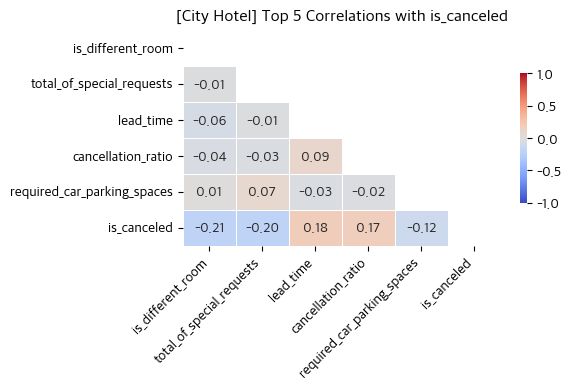

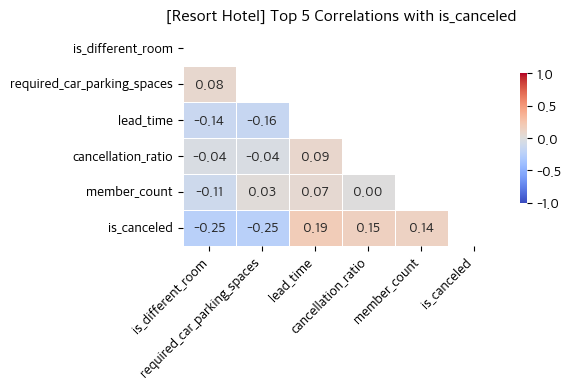

,상관계수
칼럼,
is_different_room,-0.21
total_of_special_requests,-0.20
lead_time,0.18
cancellation_ratio,0.17
required_car_parking_spaces,-0.12


,상관계수
칼럼,
is_different_room,-0.25
required_car_parking_spaces,-0.25
lead_time,0.19
cancellation_ratio,0.15
member_count,0.14


In [ ]:
from IPython.display import display

city_top_corr = plot_top_corr_heatmap(city_hotel, "[City Hotel]", top_n=5)
resort_top_corr = plot_top_corr_heatmap(resort_hotel, "[Resort Hotel]", top_n=5)

city_top_corr_df = city_top_corr.to_frame("상관계수").rename_axis("칼럼")
resort_top_corr_df = resort_top_corr.to_frame("상관계수").rename_axis("칼럼")

display(city_top_corr_df.style.format({"상관계수": "{:.2f}"}))
display(resort_top_corr_df.style.format({"상관계수": "{:.2f}"}))

두 호텔 모두 수치 데이터에서 취소율과 의미 있는 상관관계를 띠는 요소는 없다.

## 요소 분석

각 칼럼의 항목 단위로 취소율과 취소건수를 계산한다.

각 칼럼에서 가장 취소율이 높은 동시에 취소건수가 가장 많은 항목을 필터링한다.

두 호텔의 모든 요소에 대한 전체적인 그래프를 띄워본 후, 의미 있는 데이터의 구체적인 시각화를 시도한다.

표본이 너무 적은 요소는 제외하도록 최소치를 설정하였다. (City Hotel: 120 / Resort Hotel: 80)

기준은 각 호텔의 예약 건 수 (City Hotel: 43,230 / Resort Hotel: 22,947)의 약 5%p 오차 범위를 허용하는 표본 수를 약 100건 이상으로 잡았으며, 안정적인 판단을 위해 소폭 상향하였다.

In [ ]:
def create_critical_summary(df, columns, hotel_name, min_count, top_n=5):
    """
    취소율과 취소건수가 모두 최고인 항목만 추출하여 상위 N개 반환
    (reservation_status와 is_canceled 칼럼 제외)
    """
    summary_data = []
    
    for col in columns:
        # reservation_status와 is_canceled 제외
        if col in ["reservation_status", "is_canceled"]:
            continue
            
        col_summary = (
            df.groupby(col, observed=True)["is_canceled"]
              .agg(취소건수=lambda x: x.sum(), 총건수="count", 취소율="mean")
              .query("총건수 >= @min_count")
              .reset_index()
        )
        
        if col_summary.empty:
            continue
        
        # 최고 취소율
        max_rate_row = col_summary.loc[col_summary["취소율"].idxmax()]
        # 최고 취소 건수
        max_count_row = col_summary.loc[col_summary["취소건수"].idxmax()]
        
        # 항목 값이 숫자일 경우 정수로 변환
        def format_item(item):
            try:
                if isinstance(item, (int, float)) and float(item).is_integer():
                    return str(int(item))
                return str(item)
            except:
                return str(item)
        
        # 최고 취소율 항목과 최고 취소건수 항목이 동일한 경우만 추가
        if format_item(max_rate_row[col]) == format_item(max_count_row[col]):
            summary_data.append({
                "칼럼": col,
                "항목": format_item(max_rate_row[col]),
                "취소율": max_rate_row['취소율'],
                "취소율_표시": f"{max_rate_row['취소율']:.1%}",
                "취소건수": f"{int(max_rate_row['취소건수']):,}건"
            })
    
    result_df = pd.DataFrame(summary_data)
    
    # 취소율 기준 내림차순 정렬 후 상위 N개 선택
    if not result_df.empty:
        result_df = result_df.sort_values("취소율", ascending=False).head(top_n)
        result_df = result_df[["칼럼", "항목", "취소율_표시", "취소건수"]].reset_index(drop=True)
        result_df.columns = ["칼럼", "항목", "취소율", "취소건수"]
    
    return result_df

city_columns = city_hotel.columns
resort_columns = resort_hotel.columns
city_min_count = 200
resort_min_count = 100

# City Hotel 우선 대응 항목 (상위 5개)
print("=" * 100)
print(f"{'City Hotel - 취소율과 취소건수 모두 최고인 항목 TOP 5 (우선 대응 필요)':^100}")
print("=" * 100)

city_critical = create_critical_summary(city_hotel, city_columns, "City Hotel", city_min_count, top_n=5)

if not city_critical.empty:
    display(city_critical.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'nowrap'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
    ]))
else:
    print("해당하는 항목이 없습니다.")

# Resort Hotel 우선 대응 항목 (상위 5개)
print("\n" + "=" * 100)
print(f"{'Resort Hotel - 취소율과 취소건수 모두 최고인 항목 TOP 5 (우선 대응 필요)':^100}")
print("=" * 100)

resort_critical = create_critical_summary(resort_hotel, resort_columns, "Resort Hotel", resort_min_count, top_n=5)

if not resort_critical.empty:
    display(resort_critical.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'nowrap'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
    ]))
else:
    print("해당하는 항목이 없습니다.")


                         City Hotel - 취소율과 취소건수 모두 최고인 항목 TOP 5 (우선 대응 필요)                          


,칼럼,항목,취소율,취소건수
0,total_of_special_requests,0,44.3%,"8,877건"
1,agent,9,40.1%,"11,246건"
2,is_different_room,0,36.3%,"14,065건"
3,market_segment,Online TA,36.1%,"12,276건"
4,arrival_date_day_of_month,26,35.8%,552건



                        Resort Hotel - 취소율과 취소건수 모두 최고인 항목 TOP 5 (우선 대응 필요)                         


,칼럼,항목,취소율,취소건수
0,country,PRT,46.6%,"3,667건"
1,arrival_date_week_number,33,38.7%,336건
2,agent,240,38.5%,"4,818건"
3,arrival_date_month,8,36.7%,"1,289건"
4,market_segment,Online TA,34.5%,"5,463건"


                                    City Hotel - 우선 대응 필요 항목 시각화                                    


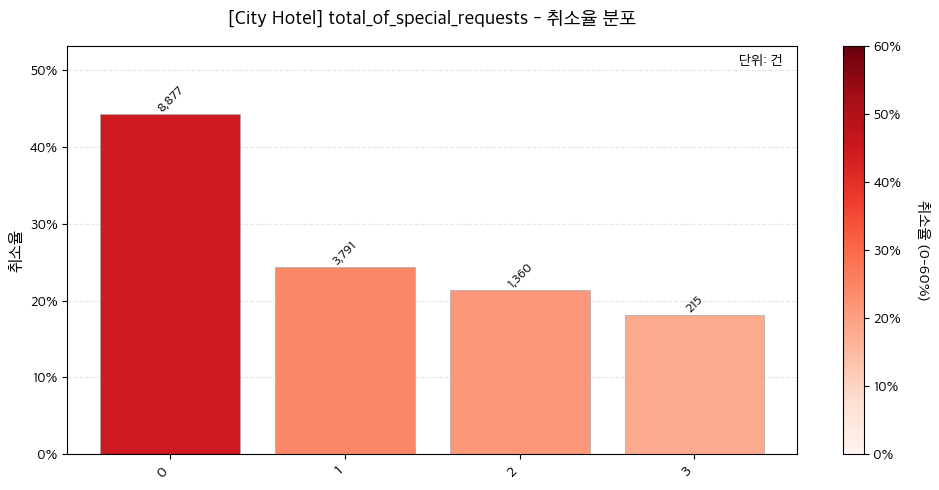

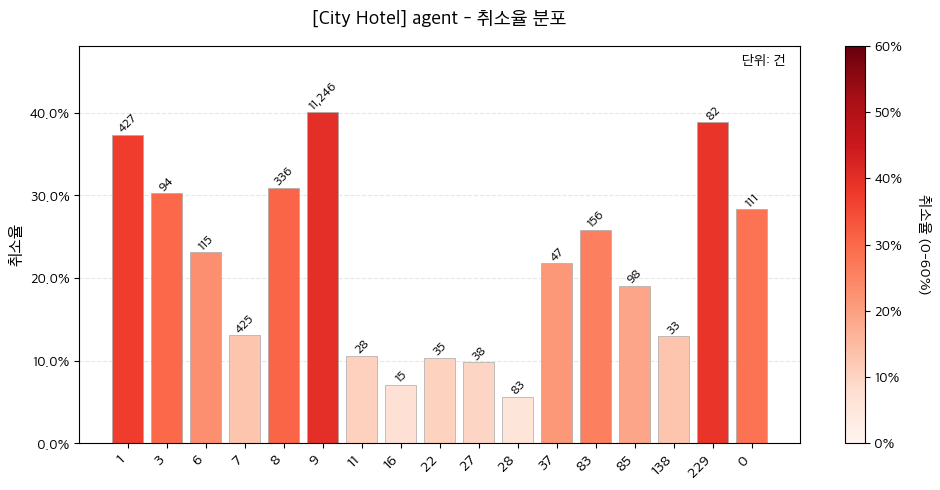

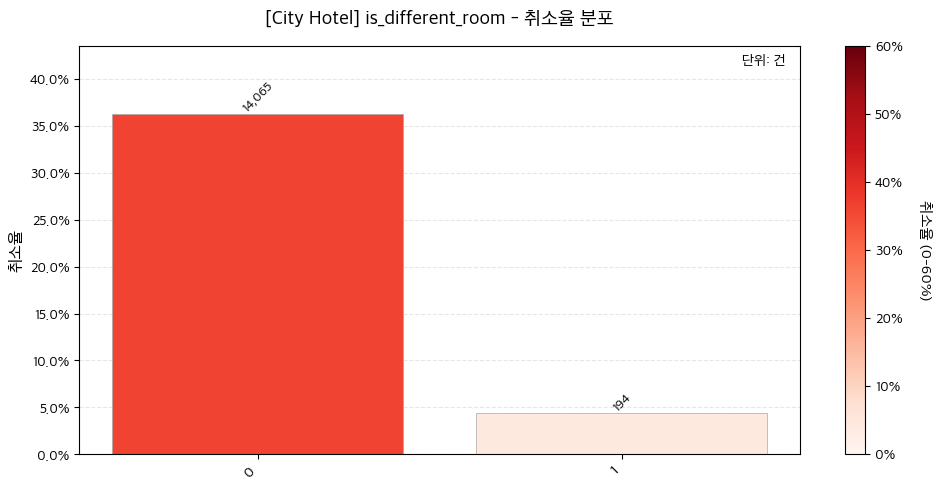

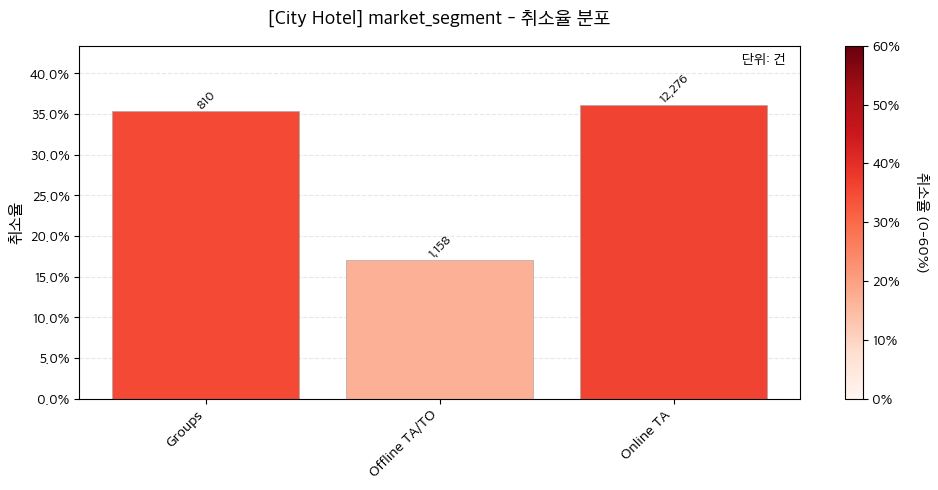

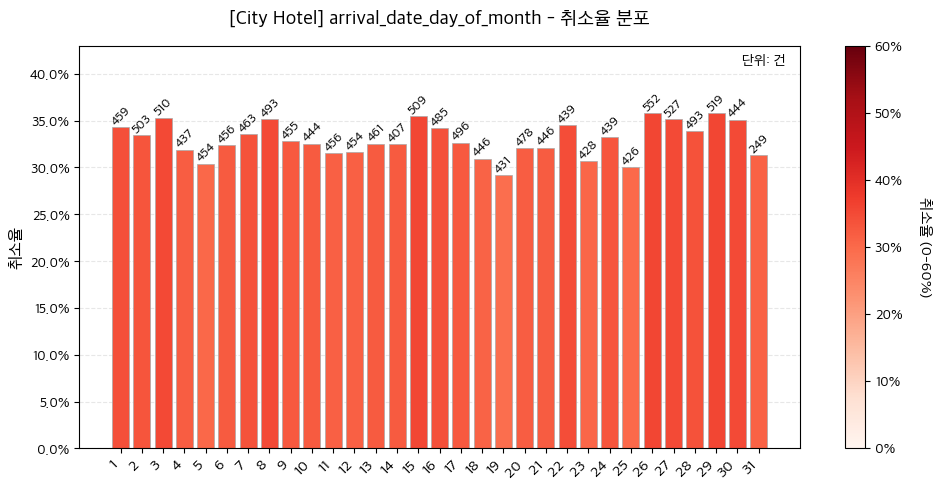


                                   Resort Hotel - 우선 대응 필요 항목 시각화                                   


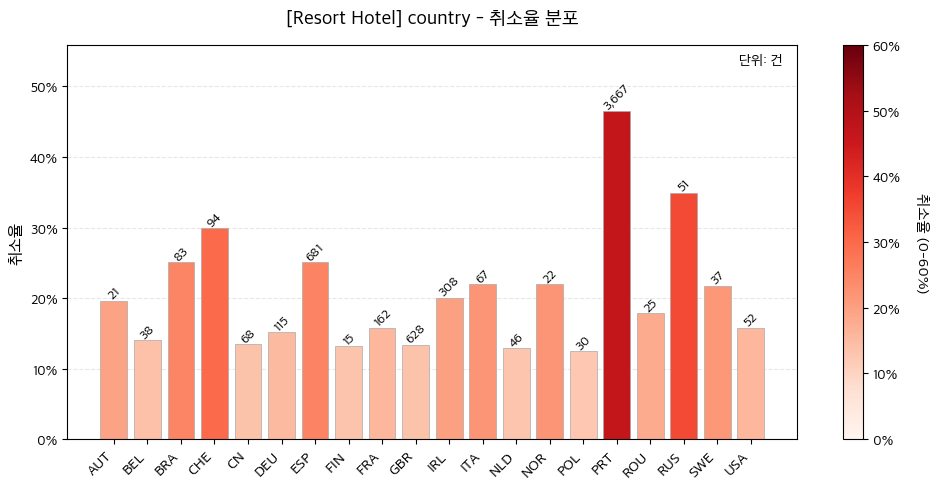

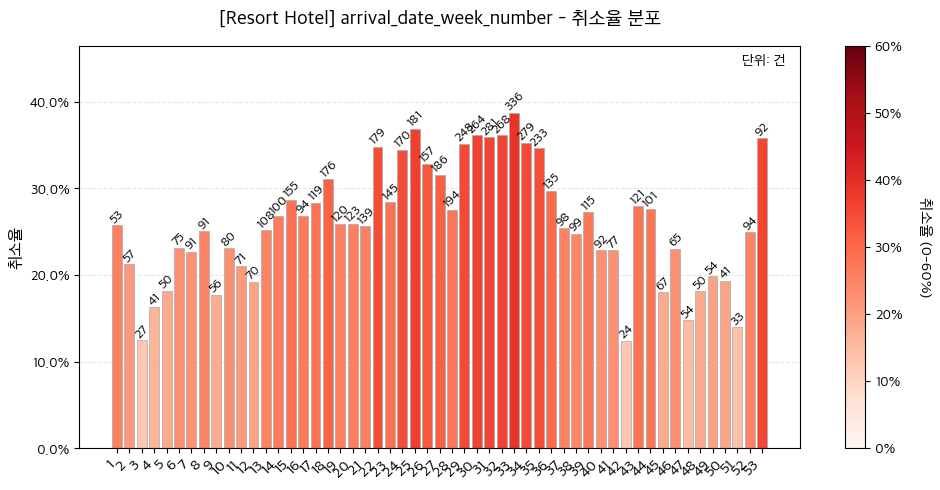

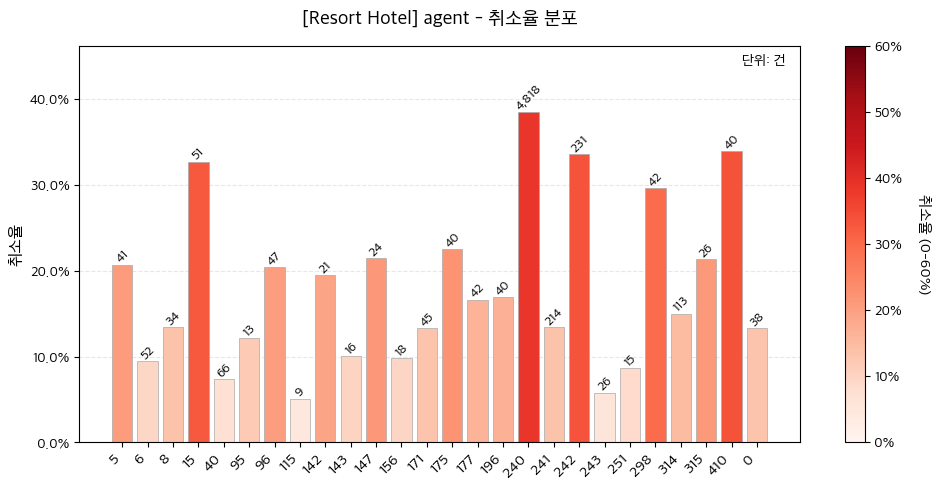

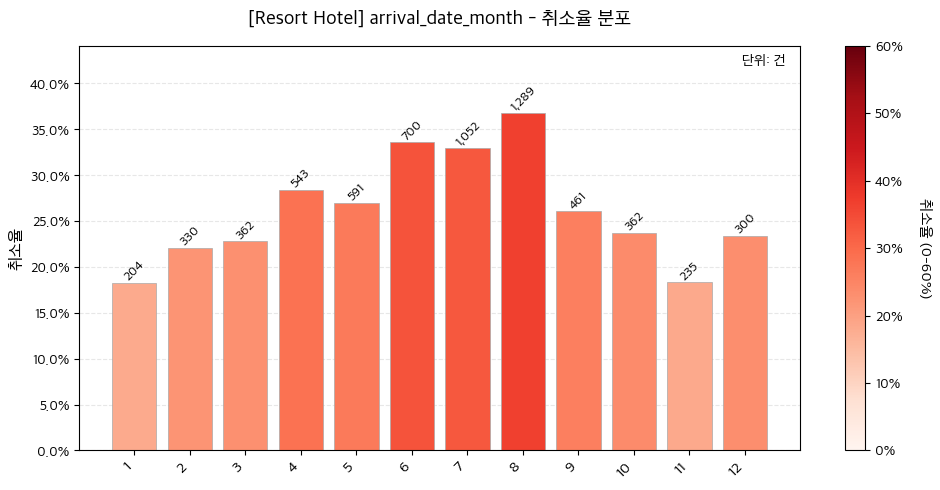

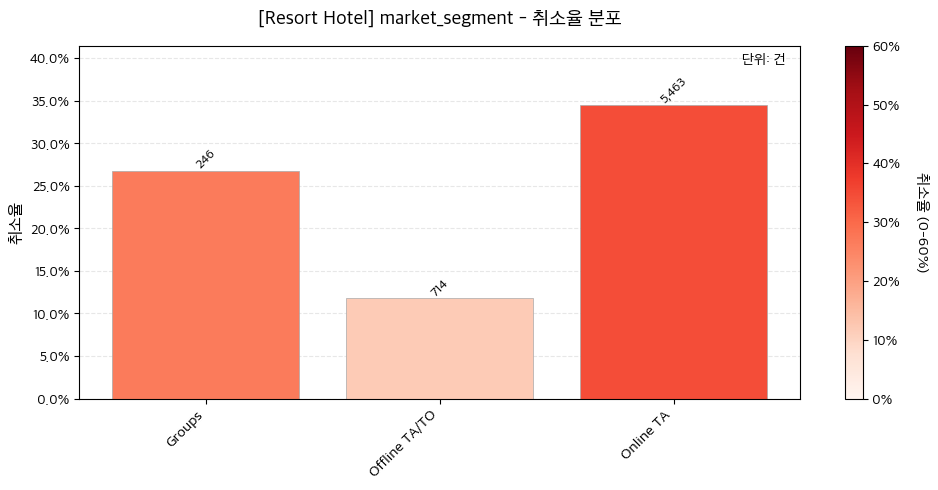

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.ticker import PercentFormatter

# 필터링된 칼럼 리스트 추출
city_column_list = list(city_critical["칼럼"])
resort_column_list = list(resort_critical["칼럼"])

def plot_cancellation_by_columns(df, columns, hotel_name, min_count):
    """
    필터링된 칼럼들의 취소율을 시각화
    """
    for col in columns:
        if col == "is_canceled":
            continue

        summary = (
            df.groupby(col, observed=True)["is_canceled"]
              .agg(총건수="count", 취소율="mean", 취소건수=lambda x: x.sum())
              .query("총건수 >= @min_count")
              .reset_index()
        )

        if summary.empty:
            continue

        # 커스텀 컬러 함수: 0-60%는 빨간색 그라데이션, 60-100%는 검정색
        def get_color(rate):
            if rate <= 0.6:
                # 0-60%: 흰색에서 진한 빨간색으로 그라데이션
                norm_rate = rate / 0.6  # 0-1로 정규화
                return plt.cm.Reds(norm_rate)
            else:
                # 60-100%: 검정색
                return 'black'
        
        colors = [get_color(rate) for rate in summary["취소율"]]

        plt.figure(figsize=(10, 5))
        ax = plt.gca()
        bars = ax.bar(
            range(len(summary)),
            summary["취소율"],
            color=colors,
            edgecolor='darkgray',
            linewidth=0.5
        )
        
        # 오른쪽 위 구석에 텍스트 추가
        ax.text(0.98, 0.98, '단위: 건', 
                transform=ax.transAxes,  # 축 좌표계 사용 (0-1 범위)
                ha='right', va='top',
                fontsize=10)


        # 막대 위에 취소 건수 표시 (45도 회전)
        for i, (bar, cancel_count) in enumerate(zip(bars, summary["취소건수"])):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(cancel_count):,}',
                ha='center', va='bottom',  # 정렬 방식 변경
                fontsize=9.5, fontweight='bold',
                rotation=45)  # 45도 회전
        
        # x축 레이블 설정
        ax.set_xticks(range(len(summary)))
        
        # 항목이 숫자일 경우 정수로 표시
        def format_label(item):
            try:
                if isinstance(item, (int, float)) and float(item).is_integer():
                    return str(int(item))
                return str(item)
            except:
                return str(item)
        
        labels = [format_label(item) for item in summary[col].tolist()]
        ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=11)
        
        ax.set_title(f"[{hotel_name}] {col} - 취소율 분포", fontsize=14, fontweight='bold', pad=15)
        ax.set_ylabel("취소율", fontsize=12)
        
        # y축 범위를 데이터에 맞게 자동 조정 (약간의 여유 추가 - 텍스트 공간 확보)
        y_max = summary["취소율"].max()
        ax.set_ylim(0, min(1.0, y_max * 1.2))
        
        # y축을 퍼센트로 표시
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        
        # 커스텀 컬러바 추가: 0-60%만 표시
        cmap_reds = plt.cm.Reds
        norm = mcolors.Normalize(vmin=0, vmax=0.6)  # 0-60% 범위로 제한

        # 컬러바 적용
        sm = plt.cm.ScalarMappable(cmap=cmap_reds, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('취소율 (0-60%)', rotation=270, labelpad=20, fontsize=11)
        cbar.ax.yaxis.set_major_formatter(PercentFormatter(1.0))

        # 그리드 추가 (가독성 향상)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        plt.tight_layout()
        plt.show()

# City Hotel 시각화 (TOP 5 항목)
print("=" * 100)
print(f"{'City Hotel - 우선 대응 필요 항목 시각화':^100}")
print("=" * 100)
plot_cancellation_by_columns(city_hotel, city_column_list, "City Hotel", city_min_count)

# Resort Hotel 시각화 (TOP 5 항목)
print("\n" + "=" * 100)
print(f"{'Resort Hotel - 우선 대응 필요 항목 시각화':^100}")
print("=" * 100)
plot_cancellation_by_columns(resort_hotel, resort_column_list, "Resort Hotel", resort_min_count)


## 결론

### 여행사

두 호텔 모두 특정 여행사의 예약에서 절대적인 건수와 상대적인 비율 모두 큰 수치의 취소가 발견된다.

City Hotel은 9번 여행사와, Resort Hotel은 240번 여행사와 긴밀하게 협력하여 취소를 함께 줄여나갈 방안을 모색해야 한다.


|  | 해당 여행사 관련 취소율 | 해당 여행사 관련 취소 건수 | Online TA 해당 취소율 | Online TA 해당 취소건수 |
|---|---|---|---|---|
| City Hotel | 40.1% | 11246건 | 36.1% | 12276건 |
| Resort Hotel | 38.5% | 4818건 | 34.5% | 5463건 |

### 계절성 

1. 시각화부터 인공지능에 의존한 점이 아쉽다.

2. 그래프의 완성도가 부족하다.

3. 빈약한 연구와 결론이 아쉽다.

4. 끼워 맞춘 듯한 보고서가 아쉽다.